In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.io import wavfile # package to read WAV file
import pandas as pd
sns.set_style("white")
sns.set_style("ticks")
import warnings
warnings.filterwarnings("ignore")
import os
import latexify as lt
mypath="data/"
(_, _, filenames) = next(os.walk(mypath))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


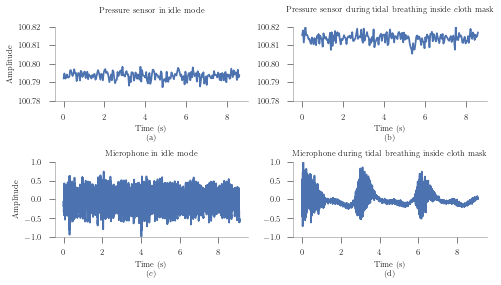

In [21]:
# raw pressure values.
figname = "pressureANDmicrophone"
lt.latexify(columns=2, fig_height=4)
fig, ax = plt.subplots(2,2)
raw = pd.read_json("data/Raw_Pressure.json", orient='keys')['payload']['values']
fs = 25
#fvcN95 = fvcN95/np.max(np.abs(fvcN95))
t = np.arange(0,len(raw))/fs
ax[0,0].plot(t,raw)
ax[0,0].set_ylim(100.78, 100.82)
ax[0,0].set_ylabel('Amplitude')
ax[0,0].set_xlabel('Time (s)\n (a)')
ax[0,0].set_title("Pressure sensor in idle mode\n")
#print("SNR of Raw Signal = ", np.mean(raw)/np.std(raw))

lt.format_axes(ax[0,0])

tidalCloth = pd.read_json("data/Rishiraj_Tidal_Cloth_1.json", orient='keys')['payload']['values']
fs = 25
#tidalCloth= tidalCloth/np.max(np.abs(tidalCloth))
t = np.arange(0,len(tidalCloth))/fs
ax[0,1].plot(t,tidalCloth)
ax[0,1].set_ylim(100.78, 100.82)
#plt.ylabel('Amplitude')
ax[0,1].set_xlabel('Time (s) \n (b)')
ax[0,1].set_title("Pressure sensor during tidal breathing inside cloth mask\n")
#print("SNR Tidal Cloth=", np.mean(tidalCloth)/np.std(tidalCloth))

#print("Difference in SNR  = ", (np.mean(raw)/np.std(raw)) - (np.mean(tidalCloth)/np.std(tidalCloth)))

lt.format_axes(ax[0,1])

idleAudio = pd.read_json("data/Audio_Sensor_Idle.json", orient='keys')['payload']['values']
idleAudio = idleAudio/np.max(np.abs(idleAudio))
fs=16000
t = np.arange(0,len(idleAudio))/fs
ax[1,0].plot(t,idleAudio)
ax[1,0].set_ylim(-1, 1)
ax[1,0].set_ylabel('Amplitude')
ax[1,0].set_xlabel('Time (s)\n (c)')
ax[1,0].set_title("Microphone in idle mode")

lt.format_axes(ax[1,0])

tidalAudio = pd.read_json("data/Audio_Sensor_Tidal_Cloth.json.json", orient='keys')['payload']['values']
tidalAudio = tidalAudio/np.max(np.abs(tidalAudio))
fs=16000
t = np.arange(0,len(tidalAudio))/fs
ax[1,1].plot(t,tidalAudio)
ax[1,1].set_ylim(-1, 1)
ax[1,1].set_xlabel('Time (s)\n (d)')
ax[1,1].set_title("Microphone during tidal breathing inside cloth mask")


#print("Difference in SNR  = ", (np.mean(idleAudio)/np.std(idleAudio)) - (np.mean(tidalAudio)/np.std(tidalAudio)))

lt.format_axes(ax[1,1])
fig.tight_layout()

plt.savefig(figname+'.pdf', bbox_inches='tight')

#print("SNR Tidal Cloth = ", np.mean(tidalCloth)/np.std(tidalCloth))

In [10]:
np.min(tidalCloth)

100.805496

In [11]:
np.min(raw)

100.787399

In [14]:
np.max(tidalCloth)

100.819778

In [15]:
np.min(raw)

100.787399

In [17]:
np.corrcoef([item2[0] for item2 in raw[:-1]],[item[0] for item in tidalCloth])

array([[1.        , 0.08885277],
       [0.08885277, 1.        ]])

In [25]:
np.corrcoef([item2 for item2 in idleAudio],[item for item in tidalAudio])

array([[1.        , 0.01021693],
       [0.01021693, 1.        ]])

SNR FVC N95= 2400.457965082116
SNR FVC N95= 25109.943129237723
SNR FVC N95= 11978.741072524317
SNR FVC N95= 46601.03570917754


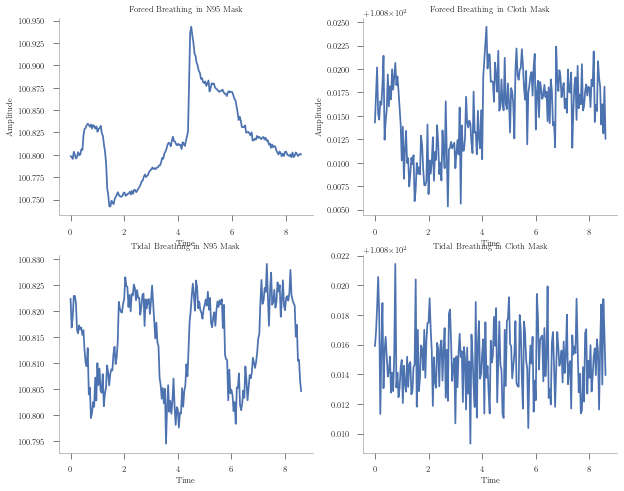

In [53]:
figname="pressure"
lt.latexify()
fig, ax = plt.subplots(2,2,figsize=(10,8))
fvcN95 = pd.read_json("data/Rishiraj_FVC_N95_1.json", orient='keys')['payload']['values']
fs = 25
#fvcN95 = fvcN95/np.max(np.abs(fvcN95))
t = np.arange(0,len(fvcN95))/fs
ax[0,0].plot(t,fvcN95)
ax[0,0].set_ylabel('Amplitude')
ax[0,0].set_xlabel('Time')
ax[0,0].set_title("Forced Breathing in N95 Mask")
#print("SNR FVC N95=", fvcN95.mean()/fvcN95.std())
print("SNR FVC N95=", np.mean(fvcN95)/np.std(fvcN95))

fvcCloth = pd.read_json("data/Rishiraj_FVC_Cloth_1.json", orient='keys')['payload']['values']
fs = 25
#fvcCloth = fvcCloth/np.max(np.abs(fvcCloth))
t = np.arange(0,len(fvcCloth))/fs
ax[0,1].plot(t,fvcCloth)
ax[0,1].set_ylabel('Amplitude')
ax[0,1].set_xlabel('Time')
ax[0,1].set_title("Forced Breathing in Cloth Mask")
#print("SNR FVC Cloth=", fvcCloth.mean()/fvcCloth.std())
print("SNR FVC N95=", np.mean(fvcCloth)/np.std(fvcCloth))

tidalN95 = pd.read_json("data/Rishiraj_Tidal_N95_1.json", orient='keys')['payload']['values']
fs = 25
#tidalN95= tidalN95/np.max(np.abs(tidalN95))
t = np.arange(0,len(tidalN95))/fs
ax[1,0].plot(t,tidalN95)
#plt.ylabel('Amplitude')
ax[1,0].set_xlabel('Time')
ax[1,0].set_title("Tidal Breathing in N95 Mask")
#print("SNR Tidal N95=", tidalN95.mean()/tidalN95.std())
print("SNR FVC N95=", np.mean(tidalN95)/np.std(tidalN95))

tidalCloth = pd.read_json("data/Rishiraj_Tidal_Cloth_1.json", orient='keys')['payload']['values']
fs = 25
#tidalCloth= tidalCloth/np.max(np.abs(tidalCloth))
t = np.arange(0,len(tidalCloth))/fs
ax[1,1].plot(t,tidalCloth)
#plt.ylabel('Amplitude')
ax[1,1].set_xlabel('Time')
ax[1,1].set_title("Tidal Breathing in Cloth Mask")
#print("SNR Tidal Cloth=", tidalCloth.mean()/tidalCloth.std())
print("SNR FVC N95=", np.mean(tidalCloth)/np.std(tidalCloth))
lt.format_axes(ax[0,0])
lt.format_axes(ax[0,1])
lt.format_axes(ax[1,0])
lt.format_axes(ax[1,1])

plt.savefig(figname+'.pdf', bbox_inches='tight')

#plt.show()

